# Importing and Visualizing the Data

In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

import requests
import zipfile


In [2]:
# Determine the path where the data is stored
train_data_path = Path(r"./Data/Train")

# Create a list of all the directory paths of the image data
image_paths_list = list(train_data_path.glob("*\*.jpg"))
image_paths_list

[WindowsPath('Data/Train/Cube/cube_0.jpg'),
 WindowsPath('Data/Train/Cube/cube_1.jpg'),
 WindowsPath('Data/Train/Cube/cube_10.jpg'),
 WindowsPath('Data/Train/Cube/cube_100.jpg'),
 WindowsPath('Data/Train/Cube/cube_11.jpg'),
 WindowsPath('Data/Train/Cube/cube_12.jpg'),
 WindowsPath('Data/Train/Cube/cube_13.jpg'),
 WindowsPath('Data/Train/Cube/cube_14.jpg'),
 WindowsPath('Data/Train/Cube/cube_15.jpg'),
 WindowsPath('Data/Train/Cube/cube_16.jpg'),
 WindowsPath('Data/Train/Cube/cube_17.jpg'),
 WindowsPath('Data/Train/Cube/cube_18.jpg'),
 WindowsPath('Data/Train/Cube/cube_19.jpg'),
 WindowsPath('Data/Train/Cube/cube_2.jpg'),
 WindowsPath('Data/Train/Cube/cube_20.jpg'),
 WindowsPath('Data/Train/Cube/cube_21.jpg'),
 WindowsPath('Data/Train/Cube/cube_22.jpg'),
 WindowsPath('Data/Train/Cube/cube_23.jpg'),
 WindowsPath('Data/Train/Cube/cube_24.jpg'),
 WindowsPath('Data/Train/Cube/cube_25.jpg'),
 WindowsPath('Data/Train/Cube/cube_26.jpg'),
 WindowsPath('Data/Train/Cube/cube_27.jpg'),
 WindowsPath

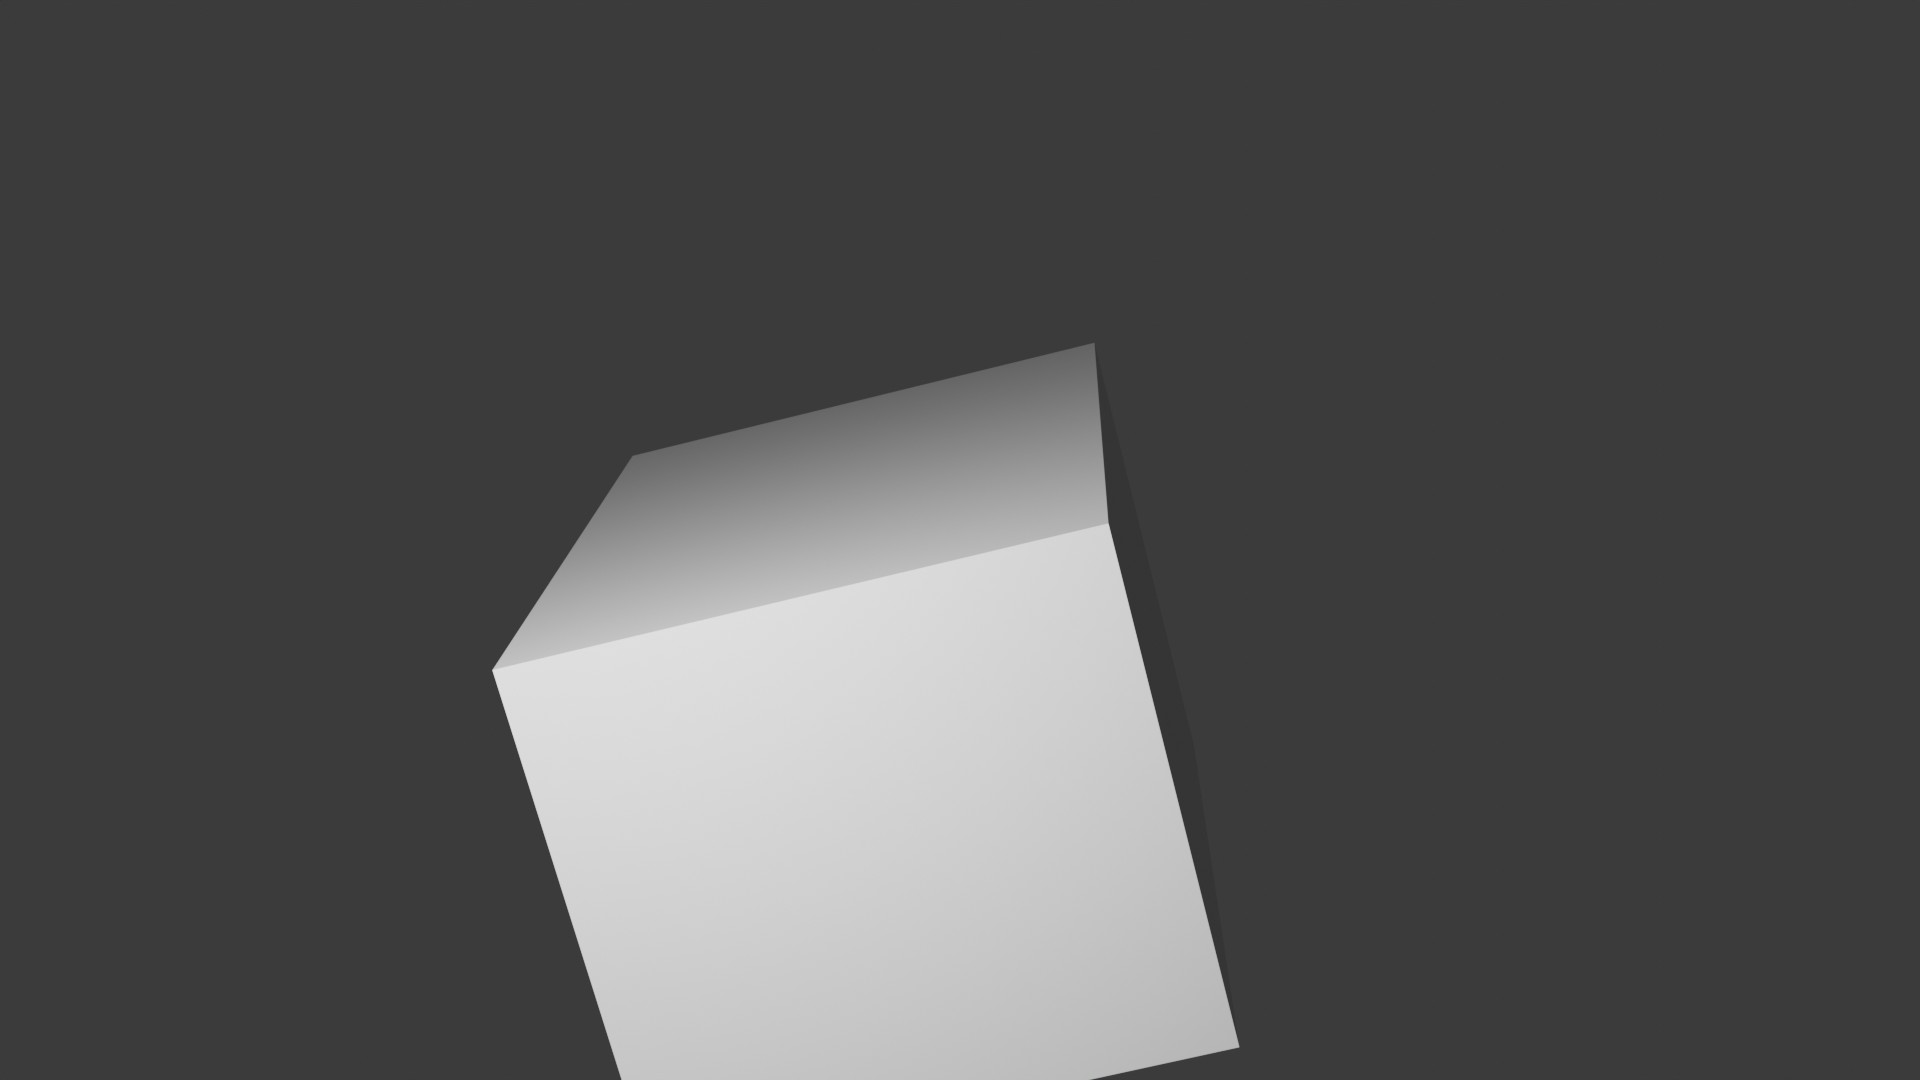

In [3]:
# Open a random image with PIL
imgn = Image.open(image_paths_list[42])
imgn

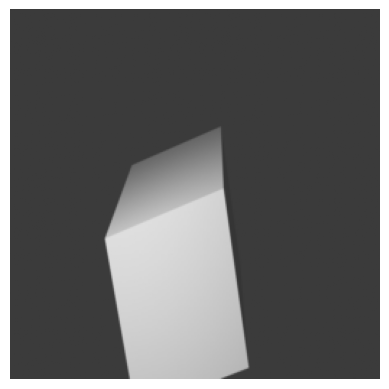

In [4]:
# Define the data-transformer to convert the image data into PyTorch Tensors of a specified dimension
data_transformer = transforms.Compose([
    transforms.Resize(size=(256,256)), #Resize the image to 256x256
    transforms.ToTensor()
])
# Transform the previous random image to a Tensor and visualize the reduction of the quality
Tensor_imgn = data_transformer(imgn)
plt.axis(False)
plt.imshow(Tensor_imgn.permute(1, 2, 0)) # The shape of the Tensor has to be changed as PyTorch has (C,H,W), while plt requires (H, W, C)

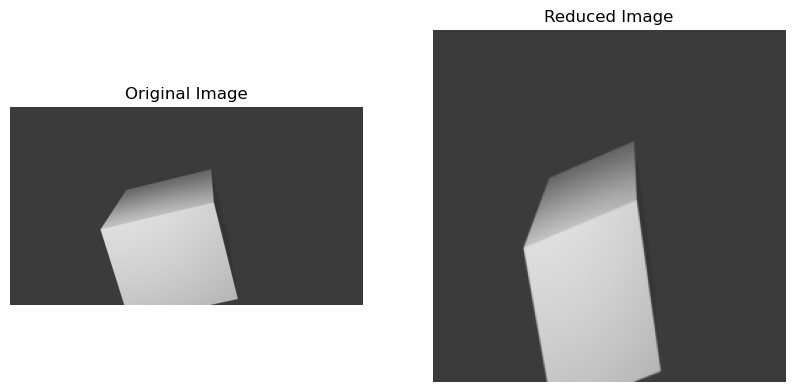

In [5]:
# Compare both next to each other:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
# Original Image
ax[0].title.set_text("Original Image")
ax[0].axis(False)
ax[0].imshow(imgn)
# Reduced Image
ax[1].title.set_text("Reduced Image")
ax[1].axis(False)
ax[1].imshow(Tensor_imgn.permute(1, 2, 0))


In [6]:
# Create the training data
train_data = datasets.ImageFolder(root=r".\Data\Train", transform=data_transformer, target_transform=None)

In [7]:
# The classes of the training data are simply the folders
train_data.classes

['Cube', 'Icosahedron', 'Icosphere', 'Pyramid', 'Suzanne', 'Torus']

In [8]:
# These classes are also assigned to indicies:
train_data.class_to_idx

{'Cube': 0,
 'Icosahedron': 1,
 'Icosphere': 2,
 'Pyramid': 3,
 'Suzanne': 4,
 'Torus': 5}

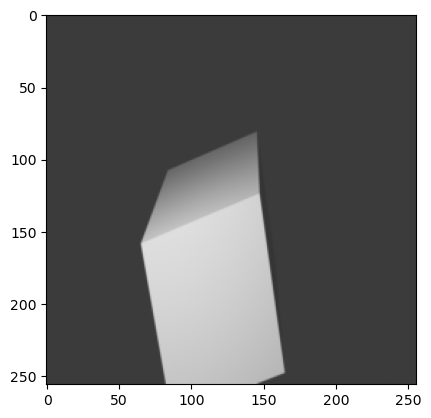

In [9]:
# Visualize an example of the training data
plt.imshow(train_data[42][0].permute(1, 2, 0))

In [10]:
# Create a train DataLoader:
batch_size = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)

In [11]:
# Check the batch size:
train_dataloader.batch_size

32

In [12]:
len(train_dataloader)

19

In [13]:
iter_train = iter(train_dataloader)

In [14]:
test1 = next(iter_train)

In [15]:
test2 = next(iter_train)

In [16]:
type(iter_train)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [17]:
test2[0][0].shape

torch.Size([3, 256, 256])

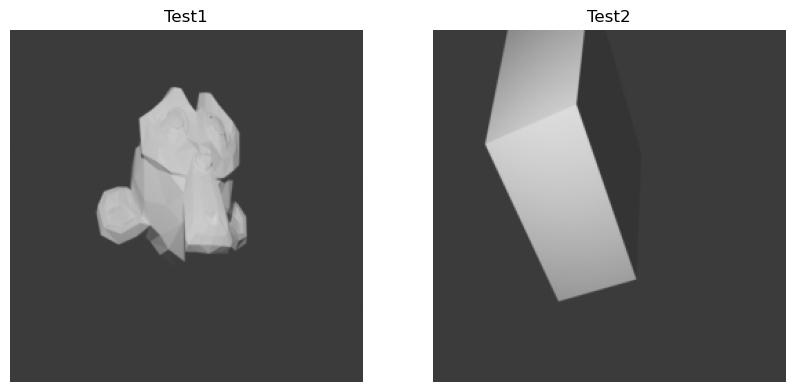

In [18]:
# Compare both next to each other:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
# Original Image
ax[0].title.set_text("Test1")
ax[0].axis(False)
ax[0].imshow(test1[0][0].permute(1, 2, 0))
# Reduced Image
ax[1].title.set_text("Test2")
ax[1].axis(False)
ax[1].imshow(test2[0][0].permute(1, 2, 0))
